## Hopfield Networks

[Neural networks and physical systems with emergent collective computationalabilities](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC346238/pdf/pnas00447-0135.pdf) (1982)

In [1]:
from hopfield import *

import os, requests, gzip, hashlib

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fetch(url):
    filepath = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(filepath):
        with open(filepath, 'rb') as f:
            data = f.read()
    else:
        with open(filepath, 'wb') as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

In [3]:
data = fetch('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')[0x10:]
data = data.reshape((-1, 784)) # 60,000 x 784
data = data / 255.0

In [4]:
# Build model
neurons = data.shape[1]
model = hopfield(neurons)

print(model.ndim, "Neurons |", int((model.ndim * (model.ndim - 1)) / 2), "Weighted connections")

784 Neurons | 306936 Weighted connections


In [5]:
model.train(data[:2], 0.1)

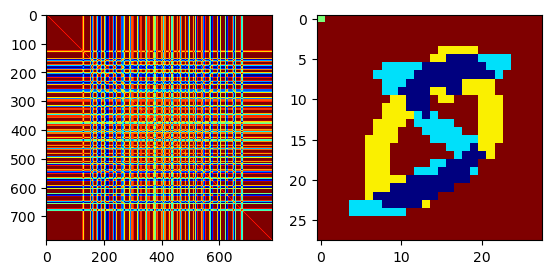

In [6]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(model.weights, cmap='jet')

plt.subplot(1,2,2)
plt.imshow(model.weights[0].reshape(28,28), cmap='jet')

In [7]:
# Infer
steps = 500
n_update = 16
energy = []

state = data[0] - np.random.randint(-1,2,(model.ndim))

for i in range(steps):
    state = model.infer(state, n_update)
    # E = model.compute_energy(state)
    E = model.L1_loss(state)
    # E = model.L2_loss(state)
    energy.append(E)

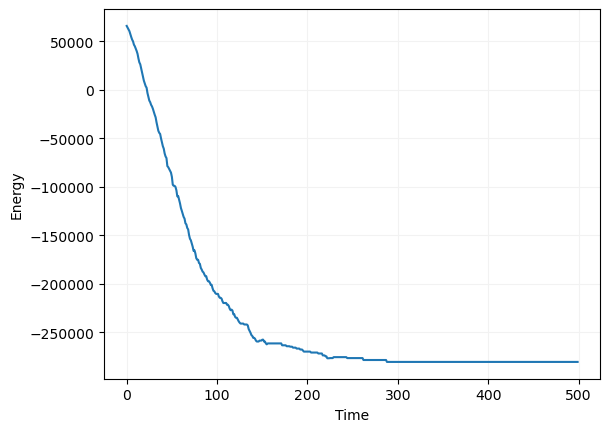

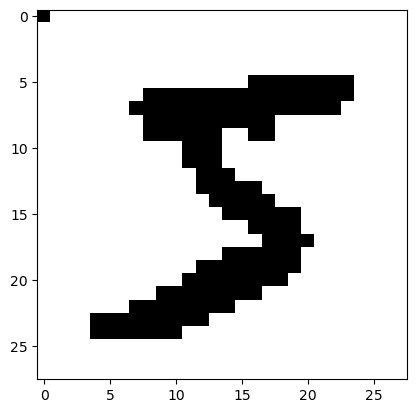

In [8]:
x = np.arange(len(energy))
y = np.array(energy).squeeze()

plt.figure()
plt.plot(x, y)
plt.grid(axis='both', color='0.95')
plt.xlabel('Time'), plt.ylabel('Energy')

plt.figure()
plt.imshow(state.reshape(28,28), cmap='binary')